In [1]:


pip install pandas

In [2]:
pip install matplotlib

In [3]:
pip install seaborn

In [4]:
pip install wordcloud

In [5]:
pip install scikit-learn

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

# Ensure inline plotting works
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Load data (replace 'your_file.csv' with your actual dataset)
file_path = "/content/cmrit.bangalore_instagram_data_.csv"  # Update with your dataset's path

try:
    # Specify 'latin1' or 'ISO-8859-1' encoding to handle non-UTF-8 characters
    data = pd.read_csv(file_path, encoding='latin1')
    print("Data loaded successfully!")
    print(data.head())  # Display the first few rows of the dataset
except FileNotFoundError:
    print("Error: Dataset file not found. Please provide the correct file path.")
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
    print("Try using a different encoding like 'latin1' or 'ISO-8859-1'.")

print("All libraries loaded successfully!")


Data loaded successfully!
               date                                            caption  \
0  06-12-2024 16:22  Department of Artificial Intelligence and Mach...   
1  06-12-2024 16:17  Codechef Club of the Department of Artificial ...   
2  05-12-2024 02:14  Department of Computer Science and Engineering...   
3  04-12-2024 12:34  Department of Electronics and Communication En...   
4  04-12-2024 11:56  Codechef Club of the Department of Artificial ...   

                                            hashtags  likes  comments  \
0  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   20.0       0.0   
1  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   23.0       0.0   
2  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   14.0       0.0   
3  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   14.0       0.0   
4  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...   51.0       0.0   

                                            post_url  
0  https://scontent-atl3-1.cdninsta

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      199 non-null    object 
 1   caption   199 non-null    object 
 2   hashtags  199 non-null    object 
 3   likes     199 non-null    float64
 4   comments  199 non-null    float64
 5   post_url  199 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.1+ KB
None


In [17]:
data.describe()

,likes,comments
count,199.000000,199.000000
mean,82.366834,0.175879
std,174.374557,0.768194
min,11.000000,0.000000
25%,30.000000,0.000000
50%,40.000000,0.000000
75%,54.000000,0.000000
max,1590.000000,6.000000


In [ ]:
from datetime import datetime

# Convert 'date' to datetime format with the correct format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')

# Create separate columns for date, time, hour, and day
data['date_only'] = data['date'].dt.date  # Extracts the date
data['time'] = data['date'].dt.time       # Extracts the time
data['hour'] = data['date'].dt.hour       # Extracts the hour
data['day'] = data['date'].dt.day_name()  # Extracts the day of the week

# Display the first few rows to check the result
print(data.head())


                 date                                            caption  \
0 2024-12-06 16:22:00  Department of Artificial Intelligence and Mach...   
1 2024-12-06 16:17:00  Codechef Club of the Department of Artificial ...   
2 2024-12-05 02:14:00  Department of Computer Science and Engineering...   
3 2024-12-04 12:34:00  Department of Electronics and Communication En...   
4 2024-12-04 11:56:00  Codechef Club of the Department of Artificial ...   

                                            hashtags  likes  comments  shares  \
0  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     20         0       1   
1  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     23         0       0   
2  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     14         0       2   
3  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     14         0       0   
4  #cmritbengaluru, #cmrit, #IIC_CMRIT, #mhrd, #m...     51         0       2   

                                            post_url   d

In [ ]:
print(data.isnull().sum())

date         0
caption      0
hashtags     0
likes        0
comments     0
shares       0
post_url     0
date_only    0
time         0
hour         0
day          0
dtype: int64


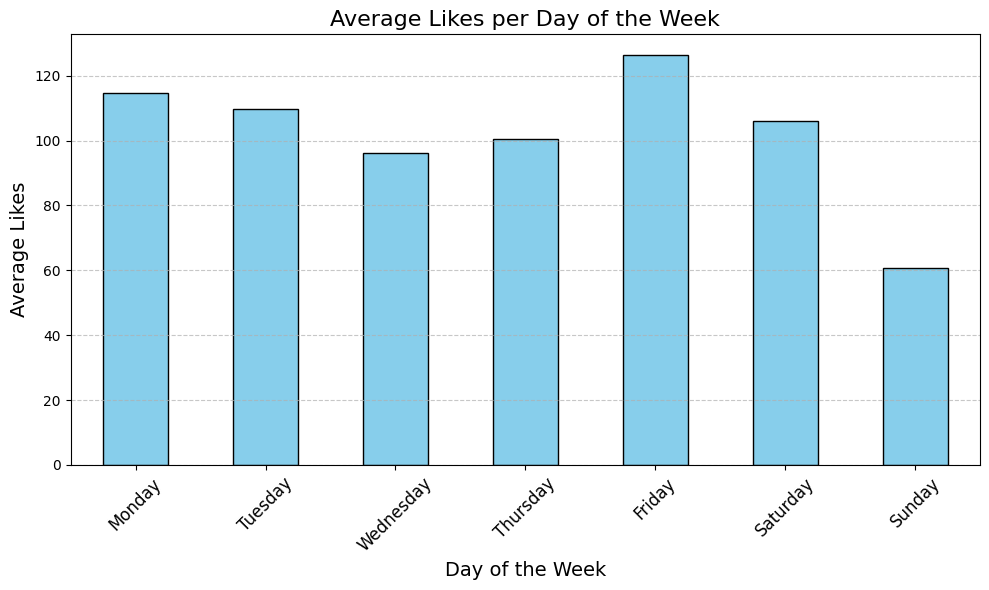

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by day of the week and calculate the average likes
likes_by_day = data.groupby('day')['likes'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the likes versus day
plt.figure(figsize=(10, 6))
likes_by_day.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels, title, and grid
plt.title('Average Likes per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Likes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

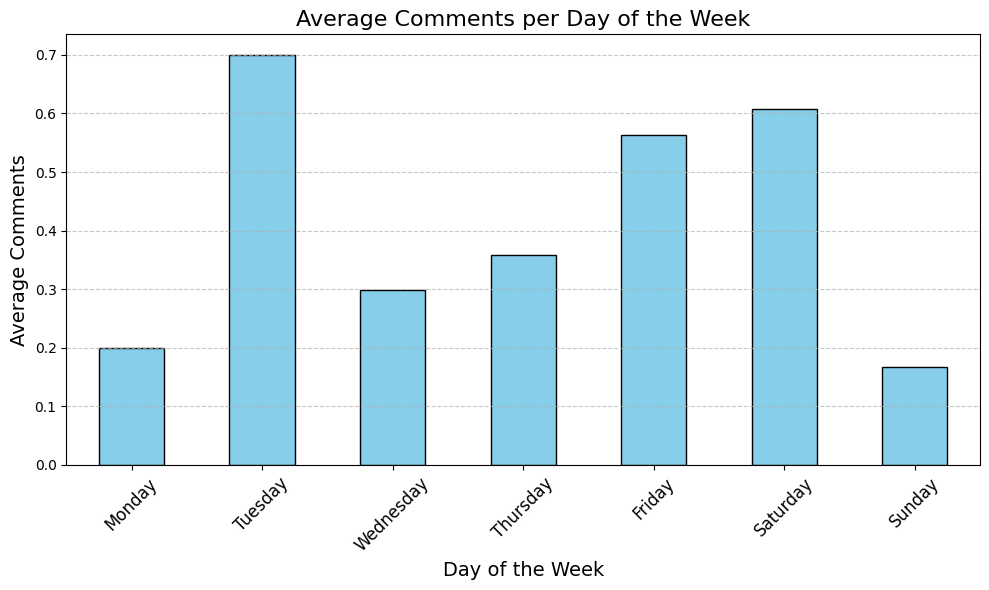

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by day of the week and calculate the average likes
likes_by_day = data.groupby('day')['comments'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the likes versus day
plt.figure(figsize=(10, 6))
likes_by_day.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels, title, and grid
plt.title('Average Comments per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Comments', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


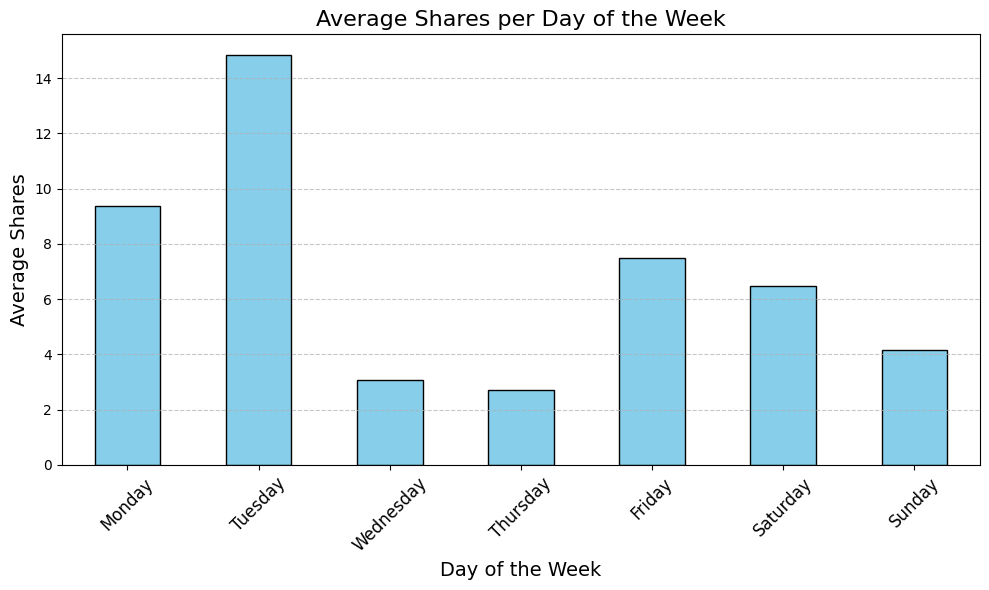

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by day of the week and calculate the average likes
likes_by_day = data.groupby('day')['shares'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the likes versus day
plt.figure(figsize=(10, 6))
likes_by_day.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels, title, and grid
plt.title('Average Shares per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Shares', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


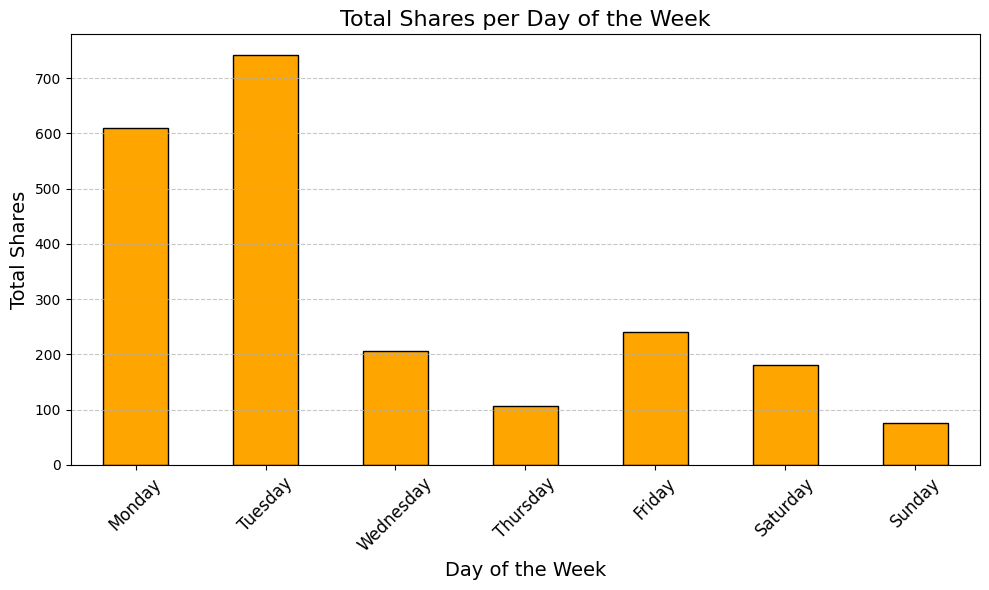

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the 'data' DataFrame already contains a 'day' and 'shares' column

# Binning and grouping data by day
shares_by_day = data.groupby('day')['shares'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting the results
plt.figure(figsize=(10, 6))
shares_by_day.plot(kind='bar', color='orange', edgecolor='black')

# Adding labels, title, and grid
plt.title('Total Shares per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Shares', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

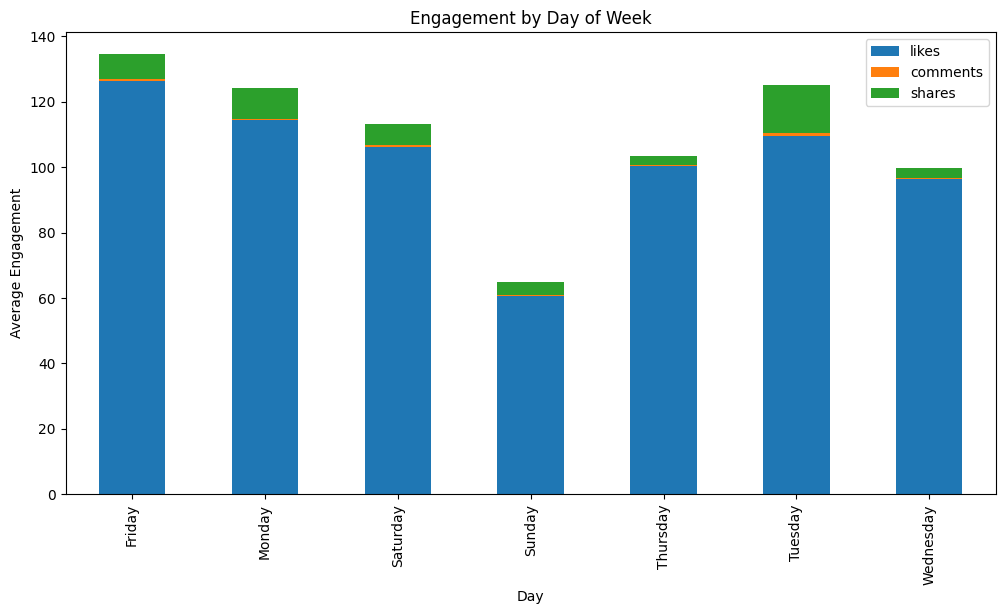

In [ ]:
# Engagement by Day
daily_engagement = data.groupby('day')[['likes', 'comments', 'shares']].mean()
daily_engagement.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Engagement by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Engagement')
plt.show()

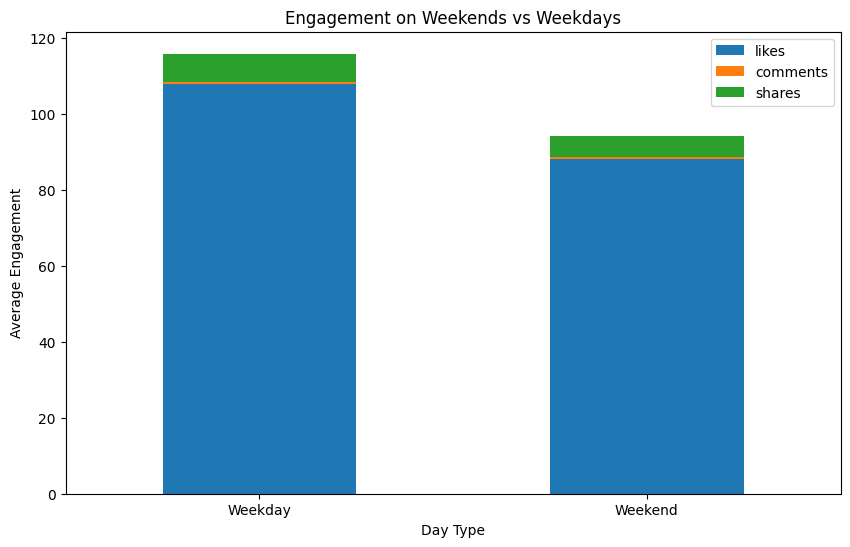

In [ ]:
# Classify posts into 'Weekday' or 'Weekend'
data['is_weekend'] = data['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Average engagement for Weekdays vs Weekends
weekend_engagement = data.groupby('is_weekend')[['likes', 'comments', 'shares']].mean()

# Plot the results
weekend_engagement.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'], stacked=True)
plt.title('Engagement on Weekends vs Weekdays')
plt.ylabel('Average Engagement')
plt.xlabel('Day Type')
plt.xticks(rotation=0)
plt.show()

                   date                                            caption  \
18  2024-11-25 12:06:00  CMR Group of Institutions (CMRGI) hosted its a...   
24  2024-11-20 11:06:00  The CMR Group of Institutions celebrated their...   
75  2024-09-09 10:48:00  Shishir Khanal (AInDS) | International Student...   
80  2024-08-30 10:56:00  Hearty Congratulations to Shubhang Tadas (EEE)...   
84  2024-08-28 11:24:00  Hearty Congratulations to Jyotsna Keerti (ISE)...   
92  2024-08-22 12:16:00  Making a solid statement in the realm of fashi...   
170 2024-05-30 14:44:00  Hearty Congratulations to the MBA team for par...   
181 2024-05-27 12:31:00  CMR Institute of Technology (CMRIT) marked a s...   
182 2024-05-27 12:25:00  CMR Institute of Technology (CMRIT) marked a s...   
195 2024-05-04 13:02:00  Hearty Congratulations to our Men's Hockey Tea...   
196 2024-05-03 14:26:00  Hearty Congratulations to Rijuth Menon R (CSE)...   
208 2024-04-22 10:51:00  Hearty Congratulations to our Samskruth

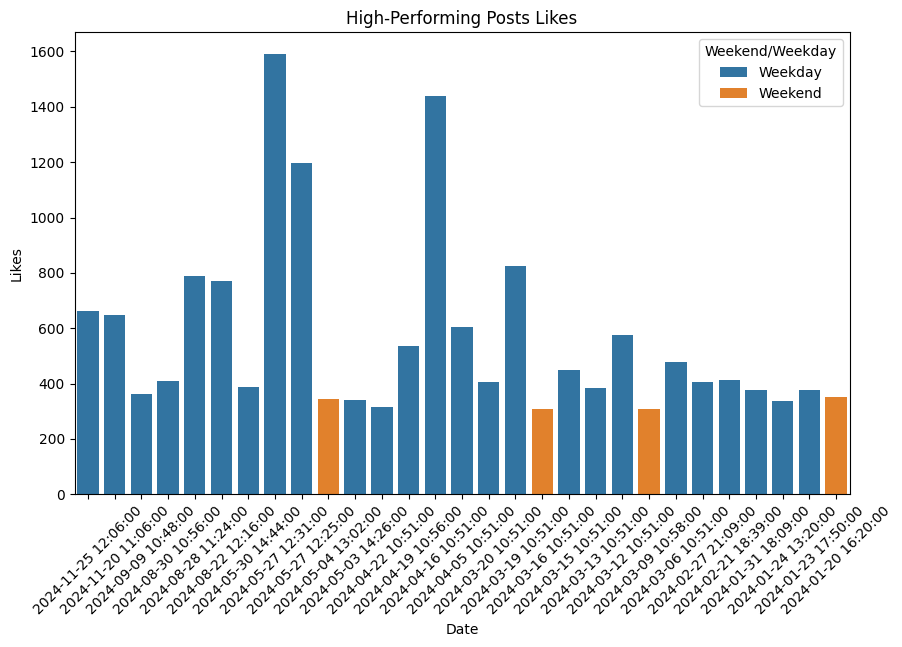

In [ ]:
# Define a threshold for "high-performing" posts based on likes
likes_threshold = data['likes'].mean() + data['likes'].std()

# Filter high-performing posts based on likes
high_performing_posts_likes = data[data['likes'] > likes_threshold]

# Display high-performing post details based on likes
print(high_performing_posts_likes[['date', 'caption', 'hashtags', 'likes', 'comments', 'shares', 'post_url']])

# Save to a CSV file for further analysis
high_performing_posts_likes.to_csv("high_performing_posts_likes.csv", index=False)

# Visualize the likes of high-performing posts
plt.figure(figsize=(10, 6))
sns.barplot(
    data=high_performing_posts_likes,
    x='date',
    y='likes',
    hue='is_weekend',
    dodge=False
)
plt.title('High-Performing Posts Likes')
plt.ylabel('Likes')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title="Weekend/Weekday")
plt.show()

                   date                                            caption  \
59  2024-09-28 05:12:00  Department of Electronics and Communication En...   
74  2024-09-10 05:24:00  Sayara Budhathoki (AInDS) | International Stud...   
75  2024-09-09 10:48:00  Shishir Khanal (AInDS) | International Student...   
84  2024-08-28 11:24:00  Hearty Congratulations to Jyotsna Keerti (ISE)...   
92  2024-08-22 12:16:00  Making a solid statement in the realm of fashi...   
161 2024-06-07 12:22:00  Department of Information Science and Engineer...   
195 2024-05-04 13:02:00  Hearty Congratulations to our Men's Hockey Tea...   
215 2024-04-16 10:51:00  CMR Institute of Technology (CMRIT) Bengaluru ...   
230 2024-03-19 10:51:00  CMRIT proudly announces the extraordinary achi...   
234 2024-03-15 10:51:00  Hearty Congratulations to Kumar Shrijan, Manis...   
241 2024-03-09 10:58:00  Hearty Congratulations to our Samskruthi Kanna...   
258 2024-02-27 21:09:00  Hearty Congratulations to our Men's Hoc

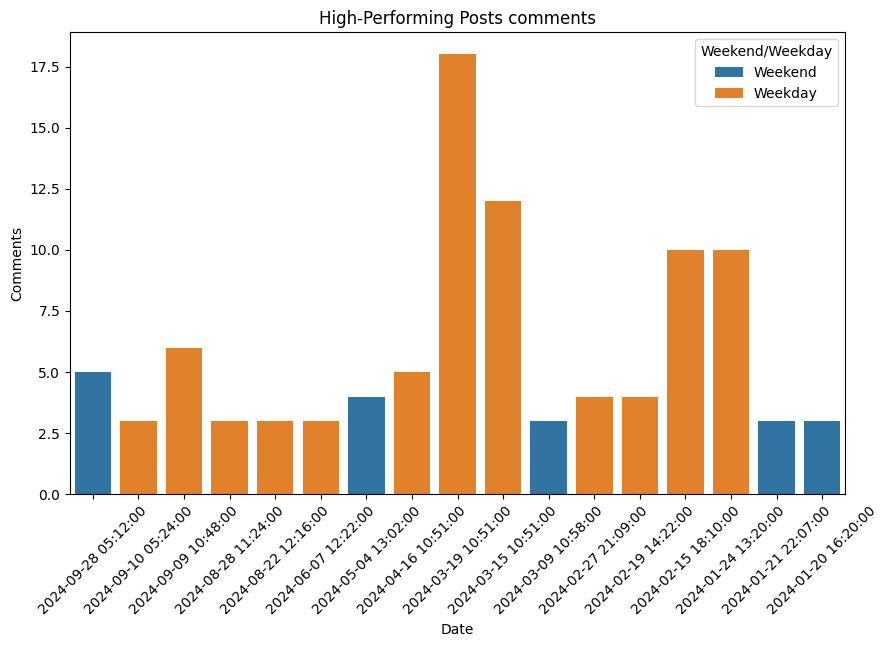

In [ ]:
# Define a threshold for "high-performing" posts based on comments
comments_threshold = data['comments'].mean() + data['comments'].std()

# Filter high-performing posts based on comments
high_performing_posts_comments = data[data['comments'] > comments_threshold]

# Display high-performing post details based on comments
print(high_performing_posts_comments[['date', 'caption', 'hashtags', 'likes', 'comments', 'shares', 'post_url']])

# Save to a CSV file for further analysis
high_performing_posts_comments.to_csv("high_performing_posts_comments.csv", index=False)

# Visualize the comments of high-performing posts
plt.figure(figsize=(10, 6))
sns.barplot(
    data=high_performing_posts_comments,
    x='date',
    y='comments',
    hue='is_weekend',
    dodge=False
)
plt.title('High-Performing Posts comments')
plt.ylabel('Comments')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title="Weekend/Weekday")
plt.show()


                   date                                            caption  \
64  2024-09-23 16:22:00  As part of the Silver Jubilee Celebrations, CM...   
74  2024-09-10 05:24:00  Sayara Budhathoki (AInDS) | International Stud...   
75  2024-09-09 10:48:00  Shishir Khanal (AInDS) | International Student...   
80  2024-08-30 10:56:00  Hearty Congratulations to Shubhang Tadas (EEE)...   
181 2024-05-27 12:31:00  CMR Institute of Technology (CMRIT) marked a s...   
182 2024-05-27 12:25:00  CMR Institute of Technology (CMRIT) marked a s...   
208 2024-04-22 10:51:00  Hearty Congratulations to our Samskruthi Kanna...   
215 2024-04-16 10:51:00  CMR Institute of Technology (CMRIT) Bengaluru ...   
230 2024-03-19 10:51:00  CMRIT proudly announces the extraordinary achi...   
238 2024-03-12 10:51:00  Hearty Congratulations to Neha G (CSE) for sec...   
241 2024-03-09 10:58:00  Hearty Congratulations to our Samskruthi Kanna...   
278 2024-01-31 18:09:00  Hearty Congratulations to Shivashankar 

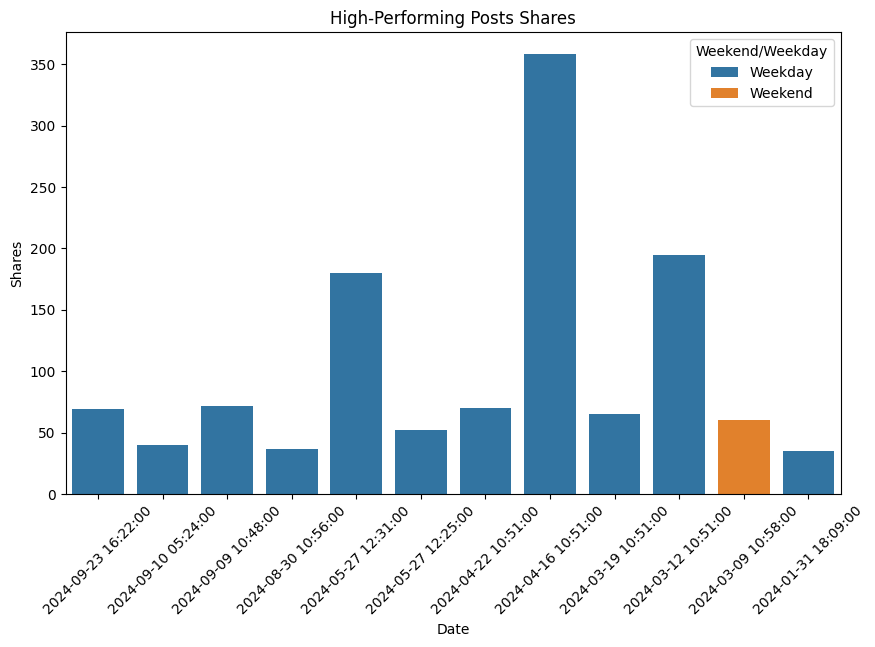

In [ ]:
# Define a threshold for "high-performing" posts based on shares
shares_threshold = data['shares'].mean() + data['shares'].std()

# Filter high-performing posts based on shares
high_performing_posts_shares = data[data['shares'] > shares_threshold]

# Display high-performing post details based on shares
print(high_performing_posts_shares[['date', 'caption', 'hashtags', 'likes', 'comments', 'shares', 'post_url']])

# Save to a CSV file for further analysis
high_performing_posts_shares.to_csv("high_performing_posts_shares.csv", index=False)

# Visualize the shares of high-performing posts
plt.figure(figsize=(10, 6))
sns.barplot(
    data=high_performing_posts_shares,
    x='date',
    y='shares',
    hue='is_weekend',
    dodge=False
)
plt.title('High-Performing Posts Shares')
plt.ylabel('Shares')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title="Weekend/Weekday")
plt.show()


                   date                                            caption  \
18  2024-11-25 12:06:00  CMR Group of Institutions (CMRGI) hosted its a...   
24  2024-11-20 11:06:00  The CMR Group of Institutions celebrated their...   
75  2024-09-09 10:48:00  Shishir Khanal (AInDS) | International Student...   
80  2024-08-30 10:56:00  Hearty Congratulations to Shubhang Tadas (EEE)...   
84  2024-08-28 11:24:00  Hearty Congratulations to Jyotsna Keerti (ISE)...   
92  2024-08-22 12:16:00  Making a solid statement in the realm of fashi...   
170 2024-05-30 14:44:00  Hearty Congratulations to the MBA team for par...   
181 2024-05-27 12:31:00  CMR Institute of Technology (CMRIT) marked a s...   
182 2024-05-27 12:25:00  CMR Institute of Technology (CMRIT) marked a s...   
195 2024-05-04 13:02:00  Hearty Congratulations to our Men's Hockey Tea...   
196 2024-05-03 14:26:00  Hearty Congratulations to Rijuth Menon R (CSE)...   
208 2024-04-22 10:51:00  Hearty Congratulations to our Samskruth

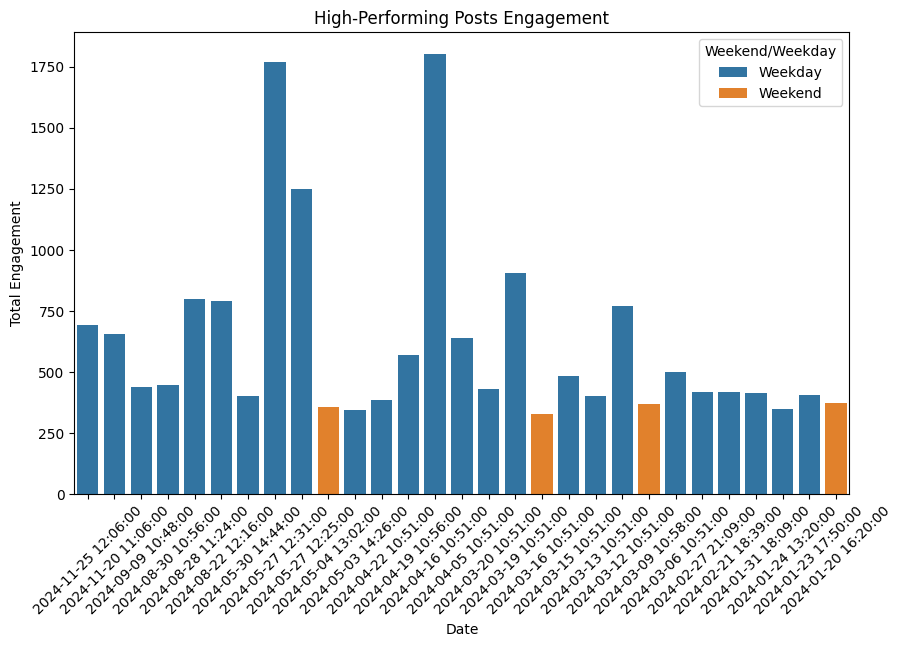

In [ ]:
# Define a threshold for "high-performing" posts based on total engagement
engagement_threshold = data['total_engagement'].mean() + data['total_engagement'].std()

# Filter high-performing posts
high_performing_posts = data[data['total_engagement'] > engagement_threshold]

# Display high-performing post details
print(high_performing_posts[['date', 'caption', 'hashtags', 'likes', 'comments', 'shares', 'post_url']])

# Save to a CSV file for further analysis
high_performing_posts.to_csv("high_performing_posts.csv", index=False)

# Visualize the engagement of high-performing posts
plt.figure(figsize=(10, 6))
sns.barplot(
    data=high_performing_posts,
    x='date',
    y='total_engagement',
    hue='is_weekend',
    dodge=False
)
plt.title('High-Performing Posts Engagement')
plt.ylabel('Total Engagement')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title="Weekend/Weekday")
plt.show()


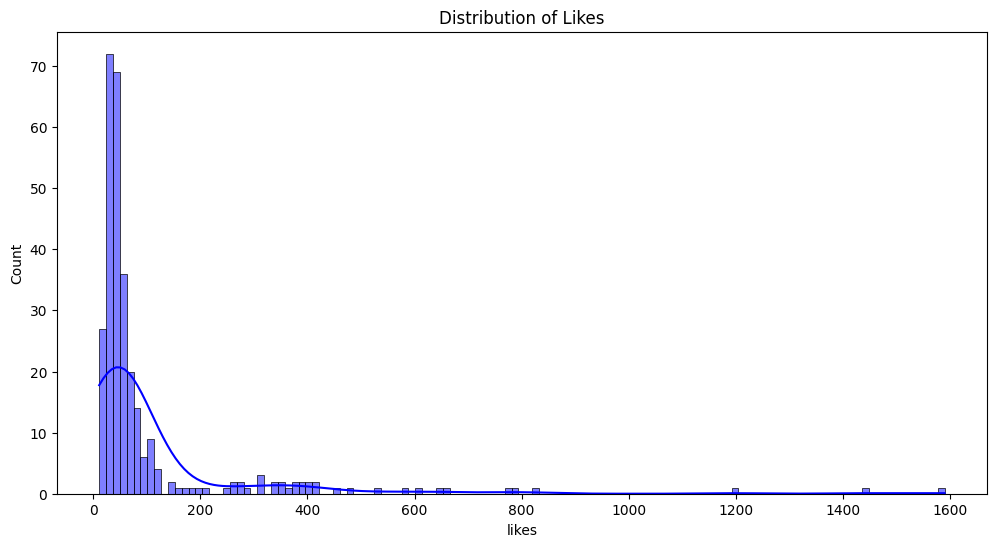

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['likes'], kde=True, color='blue')
plt.title('Distribution of Likes')
plt.show()

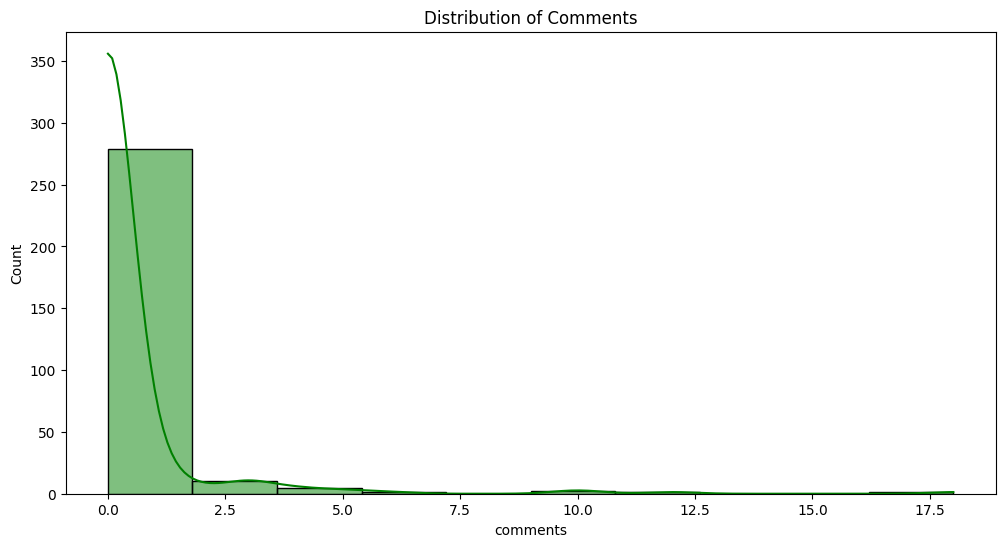

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['comments'], kde=True, color='green')
plt.title('Distribution of Comments')
plt.show()

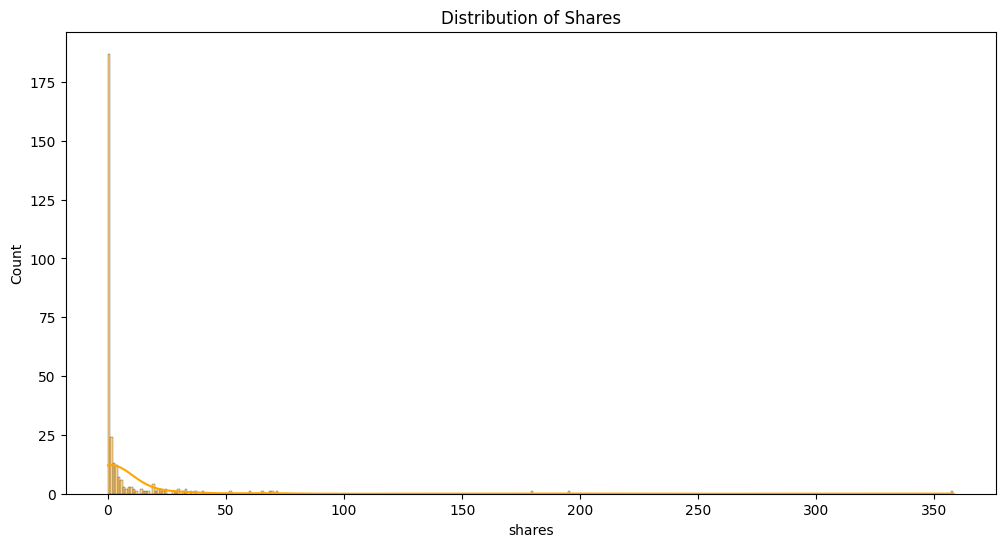

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['shares'], kde=True, color='orange')
plt.title('Distribution of Shares')
plt.show()

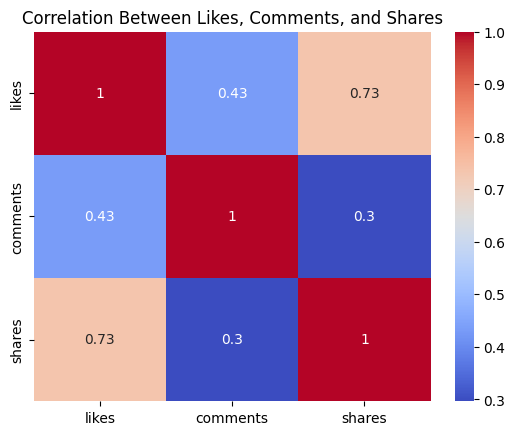

In [ ]:
correlation_matrix = data[['likes', 'comments', 'shares']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Likes, Comments, and Shares')
plt.show()

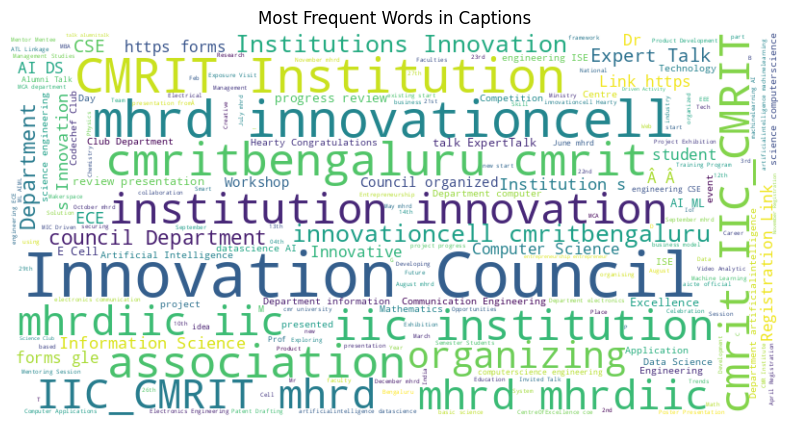

In [ ]:
# Insights on Captions
captions = ' '.join(data['caption'])
wordcloud_captions = WordCloud(width=800, height=400, background_color='white').generate(captions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_captions, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Captions')
plt.show()

                      Word  Average Engagement
11              Excellence          227.725000
15        Entrepreneurship          167.384615
7              Engineering          112.776860
0                    CMRIT          106.050542
14                 Startup           80.000000
10          CMRITBengaluru           77.624365
2               Innovation           62.844622
3               Department           61.374359
1              Institution           61.271186
9                     Talk           54.853333
13  ArtificialIntelligence           52.069767
4                     MHRD           51.510288
5                  Council           50.515152
8                 Workshop           47.592593
6                      IIC           43.755682
12               IIC_CMRIT           42.810651
16              ExpertTalk           35.400000


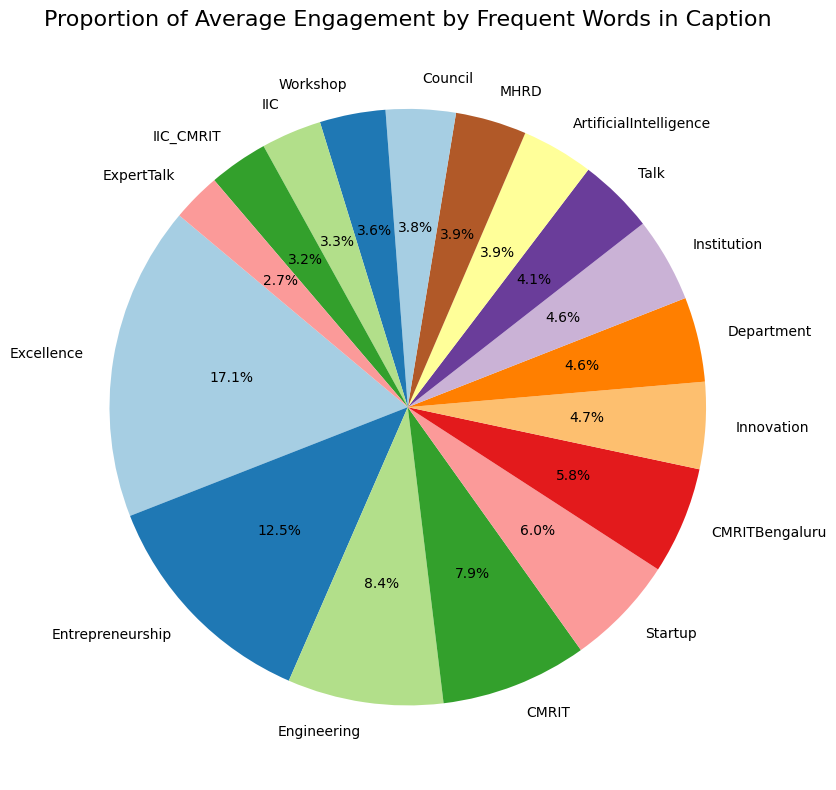

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame contains 'caption', 'likes', 'comments', and 'shares'

# Define frequently used words
frequent_words = [
    "CMRIT", "Institution", "Innovation", "Department", "MHRD", "Council", "IIC",
    "Engineering", "Workshop", "Talk", "CMRITBengaluru", "Excellence",
    "IIC_CMRIT", "ArtificialIntelligence", "Startup", "Entrepreneurship", "ExpertTalk"
]

# Initialize a list to store results
engagement_results = []

# Loop through each word and calculate average engagement
for word in frequent_words:
    # Filter posts containing the word in the caption only
    filtered_posts = data[data['caption'].str.contains(word, case=False, na=False)]

    # Calculate average engagement (likes + comments + shares)
    if not filtered_posts.empty:
        avg_engagement = (filtered_posts['likes'] + filtered_posts['comments'] + filtered_posts['shares']).mean()
    else:
        avg_engagement = 0  # If no posts contain the word

    # Append results to the list
    engagement_results.append({'Word': word, 'Average Engagement': avg_engagement})

# Convert results to a DataFrame
engagement_df = pd.DataFrame(engagement_results)

# Sort by average engagement for better readability
engagement_df = engagement_df.sort_values(by='Average Engagement', ascending=False)

# Display the results
print(engagement_df)

# Plot the results as a pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    engagement_df['Average Engagement'],
    labels=engagement_df['Word'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

# Add title
plt.title('Proportion of Average Engagement by Frequent Words in Caption', fontsize=16)

# Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()


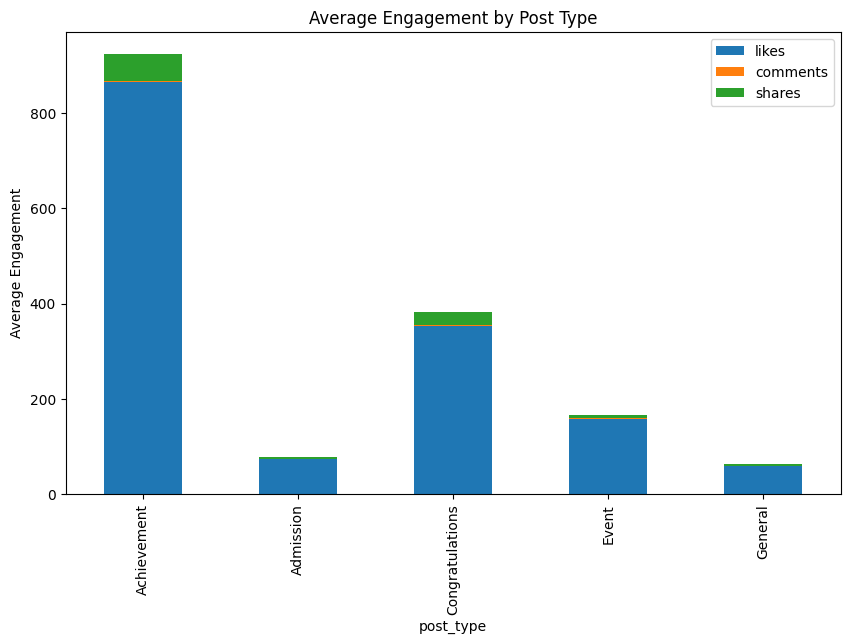

In [ ]:
# Define post categories based on captions or hashtags
def categorize_post(caption):
    if "event" in caption.lower():
        return "Event"
    elif "achievement" in caption.lower():
        return "Achievement"
    elif "congratulations" in caption.lower():
        return "Congratulations"
    elif "admission" in caption.lower():
        return "Admission"
    else:
        return "General"

data['post_type'] = data['caption'].apply(categorize_post)

# Average engagement by post type
post_type_engagement = data.groupby('post_type')[['likes', 'comments', 'shares']].mean()
post_type_engagement.plot(kind='bar', figsize=(10, 6), stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Engagement by Post Type')
plt.ylabel('Average Engagement')
plt.show()


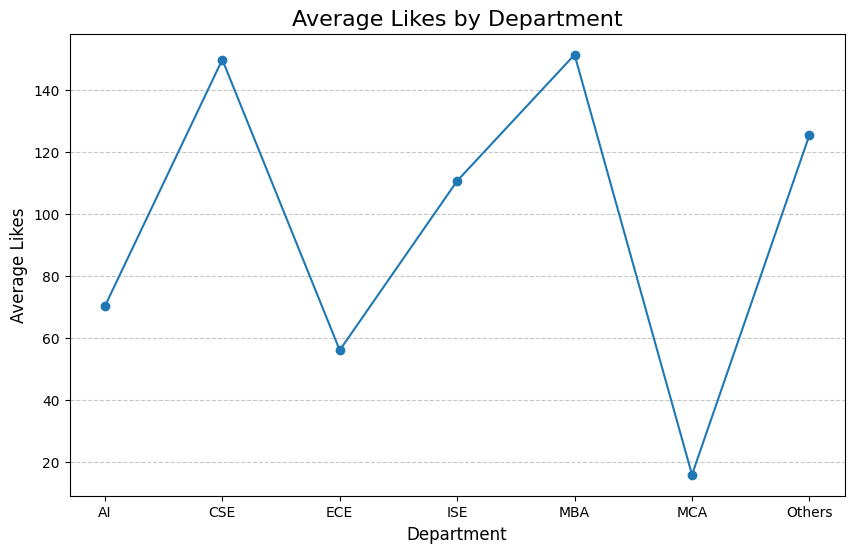

In [ ]:
# Average likes by department
department_likes = data.groupby('department')['likes'].mean()

# Plot average likes by department using a line plot
plt.figure(figsize=(10, 6))
plt.plot(department_likes.index, department_likes.values, marker='o', linestyle='-', color='#1f77b4')

# Add title and labels
plt.title('Average Likes by Department', fontsize=16)
plt.ylabel('Average Likes', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


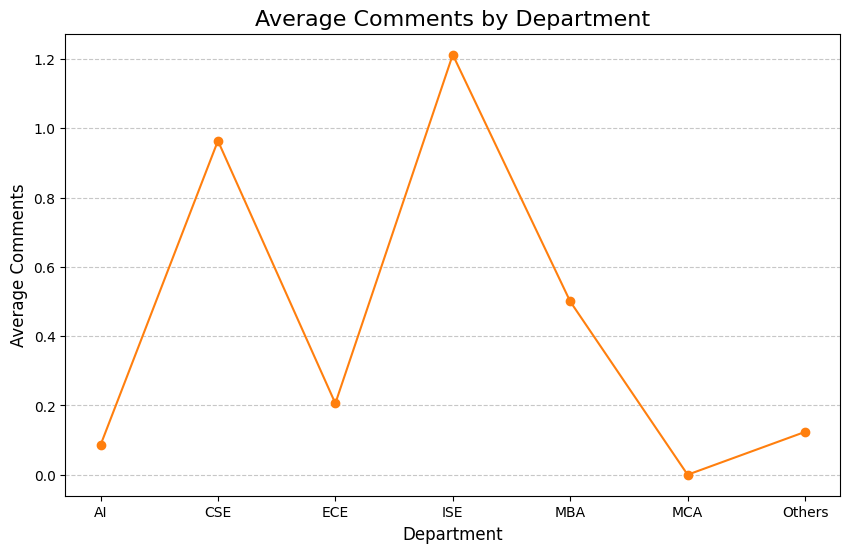

In [ ]:
# Average comments by department
department_comments = data.groupby('department')['comments'].mean()

# Plot average comments by department using a line plot
plt.figure(figsize=(10, 6))
plt.plot(department_comments.index, department_comments.values, marker='o', linestyle='-', color='#ff7f0e')

# Add title and labels
plt.title('Average Comments by Department', fontsize=16)
plt.ylabel('Average Comments', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


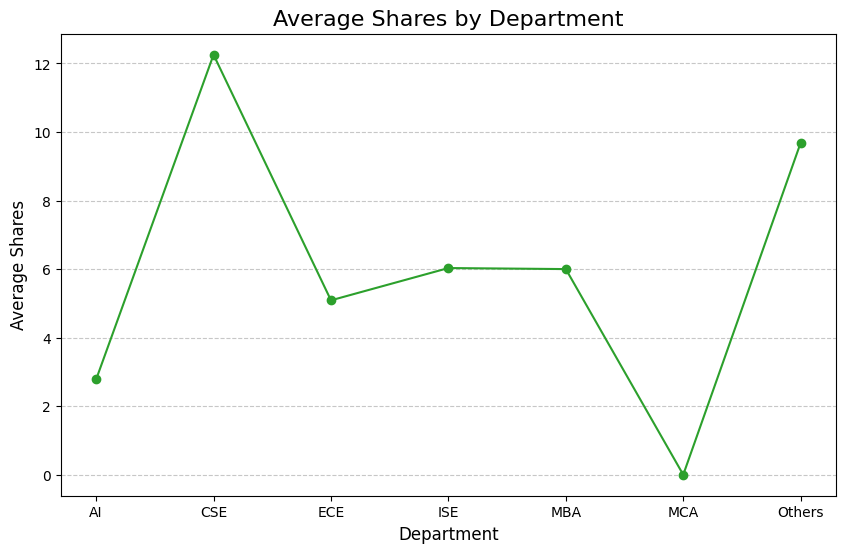

In [ ]:
# Plot average shares by department using a line plot
plt.figure(figsize=(10, 6))
plt.plot(department_shares.index, department_shares.values, marker='o', linestyle='-', color='#2ca02c')

# Add title and labels
plt.title('Average Shares by Department', fontsize=16)
plt.ylabel('Average Shares', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


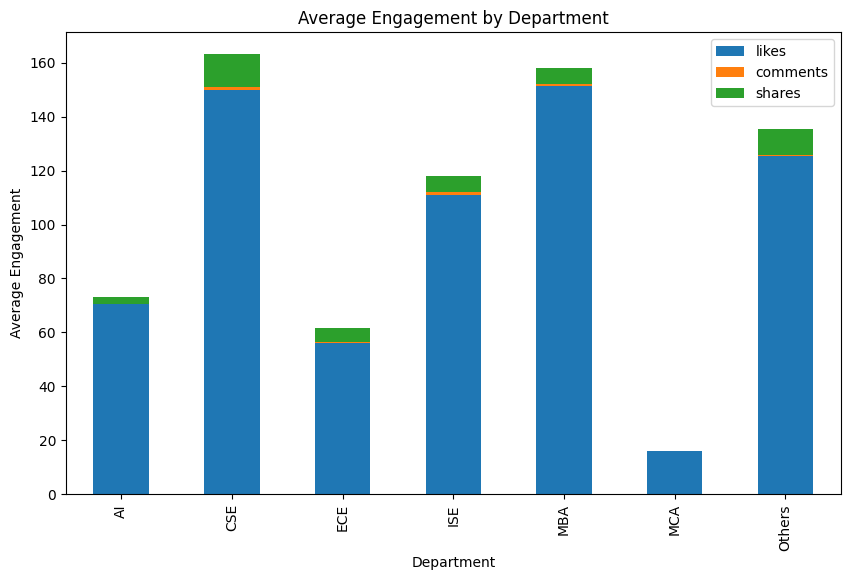

In [ ]:
# Identify department-related posts
def department_category(caption):
    if "cse" in caption.lower():
        return "CSE"
    if "ise" in caption.lower():
        return "ISE"
    elif "ece" in caption.lower():
        return "ECE"
    elif "ai" in caption.lower():
        return "AI"
    elif "mba" in caption.lower():
        return "MBA"
    elif "mca" in caption.lower():
        return "MCA"
    else:
        return "Others"

data['department'] = data['caption'].apply(department_category)

# Average engagement by department
department_engagement = data.groupby('department')[['likes', 'comments', 'shares']].mean()
department_engagement.plot(kind='bar', figsize=(10, 6), stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Engagement by Department')
plt.ylabel('Average Engagement')
plt.xlabel('Department')
plt.show()

In [ ]:
# Filter the posts where the caption length is >= 500
posts_with_long_caption = data[data['caption'].str.len() >= 500][['date', 'likes', 'caption']]

# Display the filtered posts with date, likes, and caption
print(posts_with_long_caption)


                   date  likes  \
2   2024-12-05 02:14:00     14   
3   2024-12-04 12:34:00     14   
4   2024-12-04 11:56:00     51   
8   2024-12-04 07:43:00     15   
9   2024-12-04 06:52:00     23   
..                  ...    ...   
277 2024-02-03 14:09:00     91   
279 2024-01-30 14:09:00     72   
282 2024-01-25 12:24:00    287   
283 2024-01-24 13:20:00    336   
284 2024-01-23 17:50:00    376   

                                               caption  
2    Department of Computer Science and Engineering...  
3    Department of Electronics and Communication En...  
4    Codechef Club of the Department of Artificial ...  
8    Centre of Excellence in Video Analytics, Depar...  
9    The following Faculty Innovative and Entrepren...  
..                                                 ...  
277  I&E Cell of Basic Science and Humanities in as...  
279  The following business models are presented in...  
282  Hearty Congratulations to our Tug of War Team ...  
283  Hearty Congratul

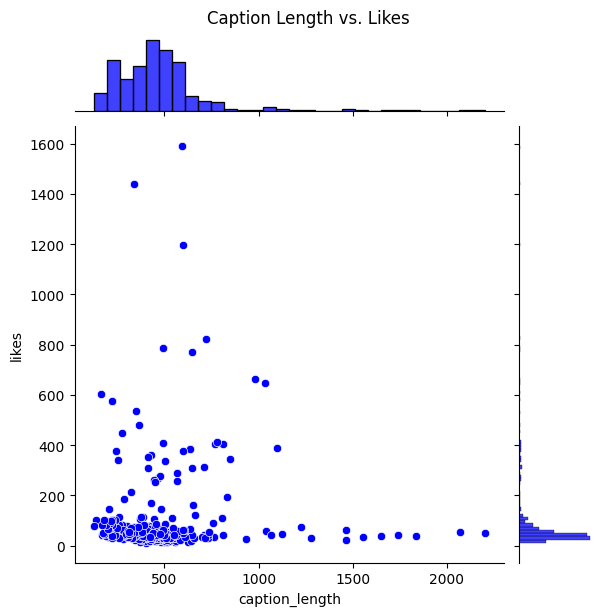

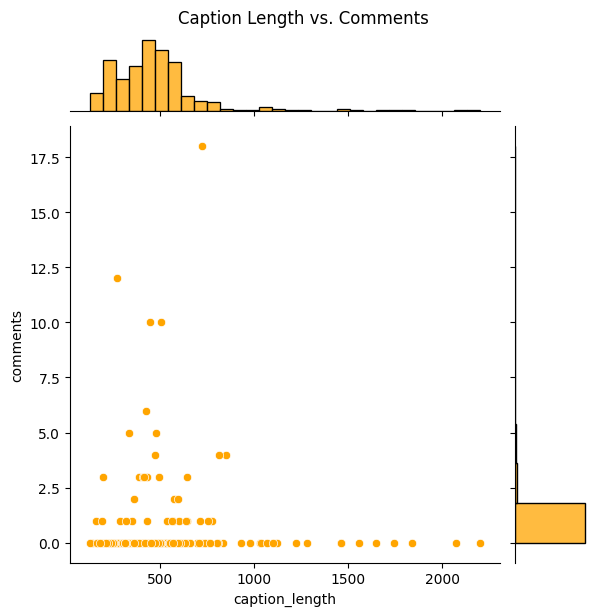

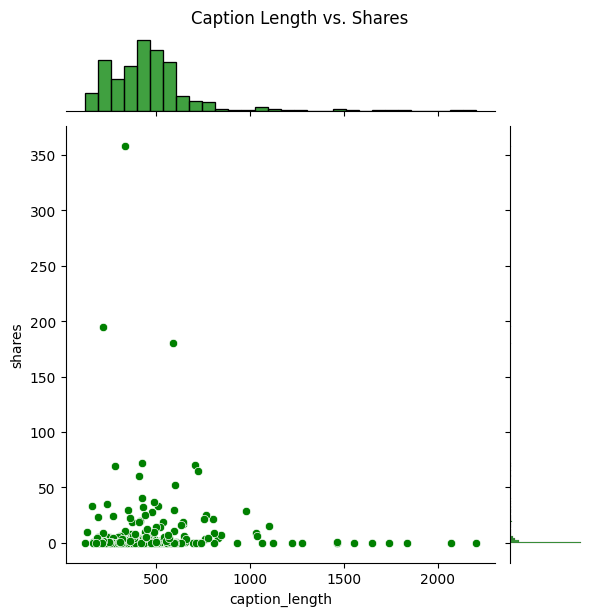

In [ ]:
# Calculate caption length
data['caption_length'] = data['caption'].apply(len)

# Plot engagement vs. caption length
sns.jointplot(data=data, x='caption_length', y='likes', kind='scatter', color='blue')
plt.suptitle('Caption Length vs. Likes', y=1.02)
plt.show()

sns.jointplot(data=data, x='caption_length', y='comments', kind='scatter', color='orange')
plt.suptitle('Caption Length vs. Comments', y=1.02)
plt.show()

sns.jointplot(data=data, x='caption_length', y='shares', kind='scatter', color='green')
plt.suptitle('Caption Length vs. Shares', y=1.02)
plt.show()

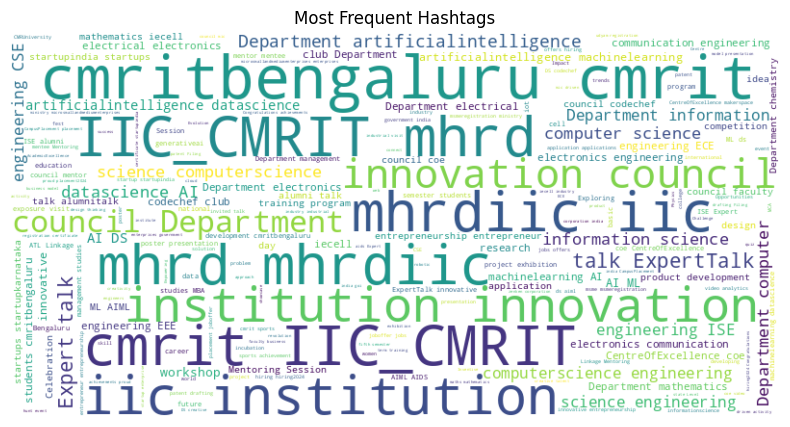

In [ ]:
# WordCloud for Hashtags
hashtags = ' '.join(data['hashtags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Hashtags')
plt.show()

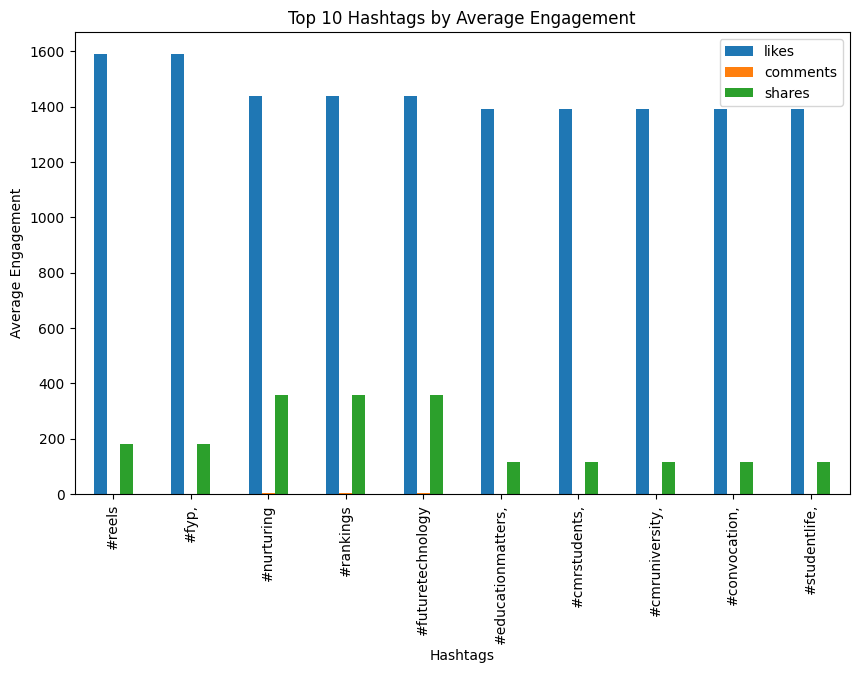

In [ ]:
# Explode hashtags into individual words
data['hashtags_list'] = data['hashtags'].apply(lambda x: x.split())
hashtags_exploded = data.explode('hashtags_list')

# Top 10 hashtags by average engagement
top_hashtags = (
    hashtags_exploded.groupby('hashtags_list')[['likes', 'comments', 'shares']]
    .mean()
    .sort_values('likes', ascending=False)
    .head(10)
)
top_hashtags.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Top 10 Hashtags by Average Engagement')
plt.ylabel('Average Engagement')
plt.xlabel('Hashtags')
plt.show()

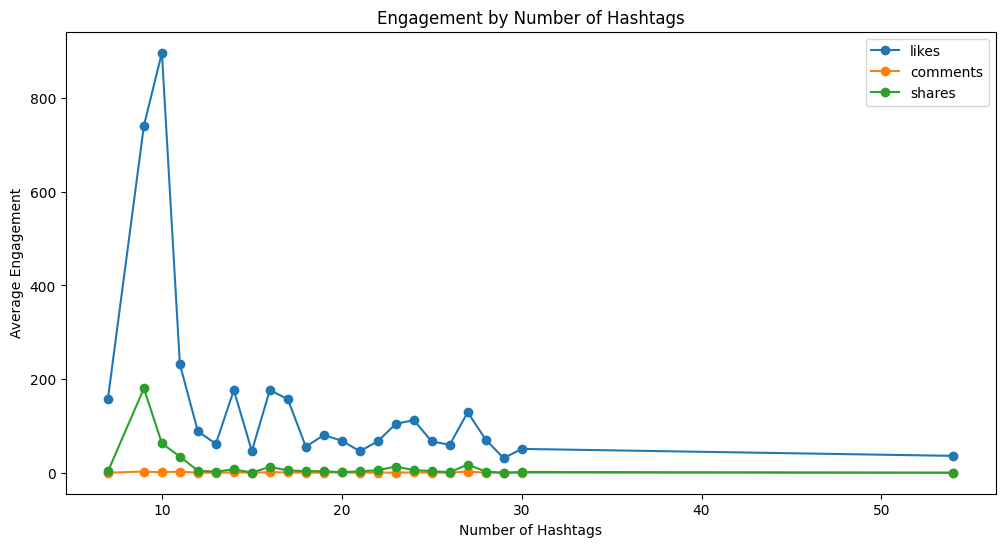

In [ ]:
# Count the number of hashtags in each post
data['num_hashtags'] = data['hashtags'].apply(lambda x: len(x.split()))

# Engagement by number of hashtags
hashtag_engagement = data.groupby('num_hashtags')[['likes', 'comments', 'shares']].mean()
hashtag_engagement.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Engagement by Number of Hashtags')
plt.xlabel('Number of Hashtags')
plt.ylabel('Average Engagement')
plt.show()


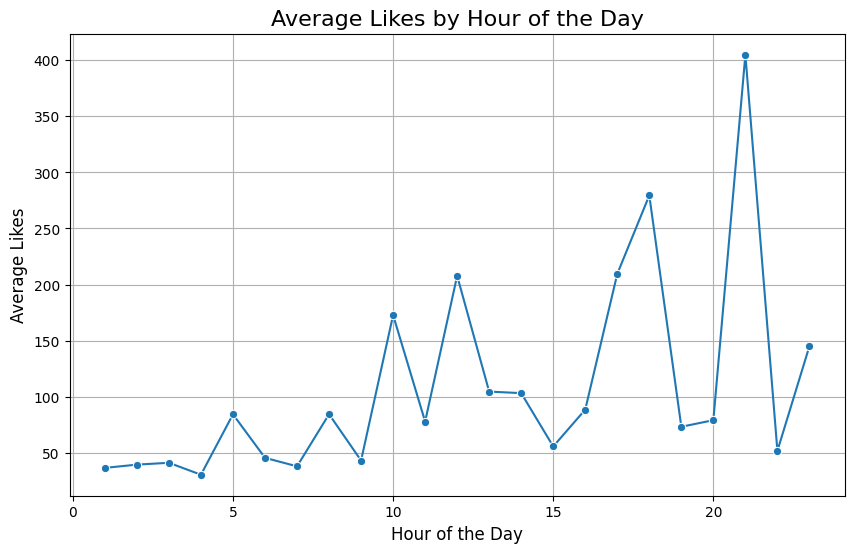

In [ ]:
# Group by 'hour' and calculate the average number of likes for each hour
likes_by_hour = data.groupby('hour')['likes'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=likes_by_hour.index, y=likes_by_hour.values, marker='o')

# Adding labels and title
plt.title('Average Likes by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Likes', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


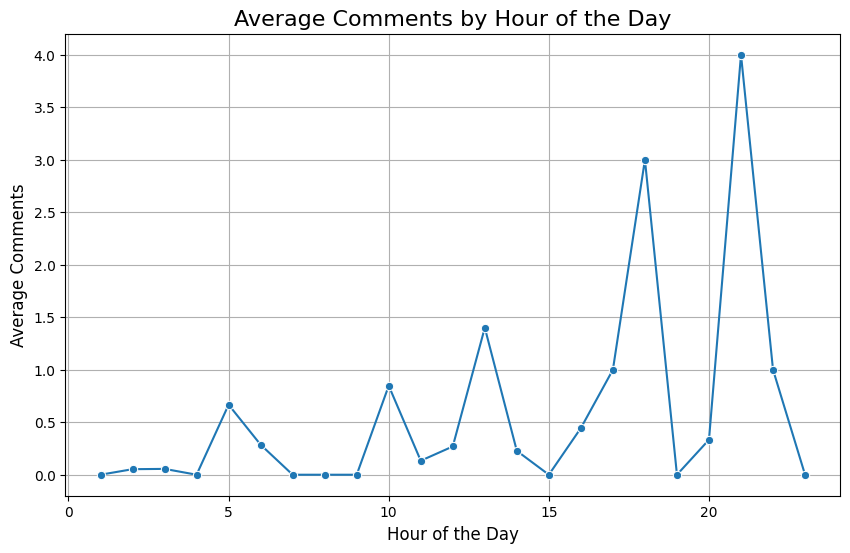

In [ ]:
# Group by 'hour' and calculate the average number of likes for each hour
likes_by_hour = data.groupby('hour')['comments'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=likes_by_hour.index, y=likes_by_hour.values, marker='o')

# Adding labels and title
plt.title('Average Comments by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Comments', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


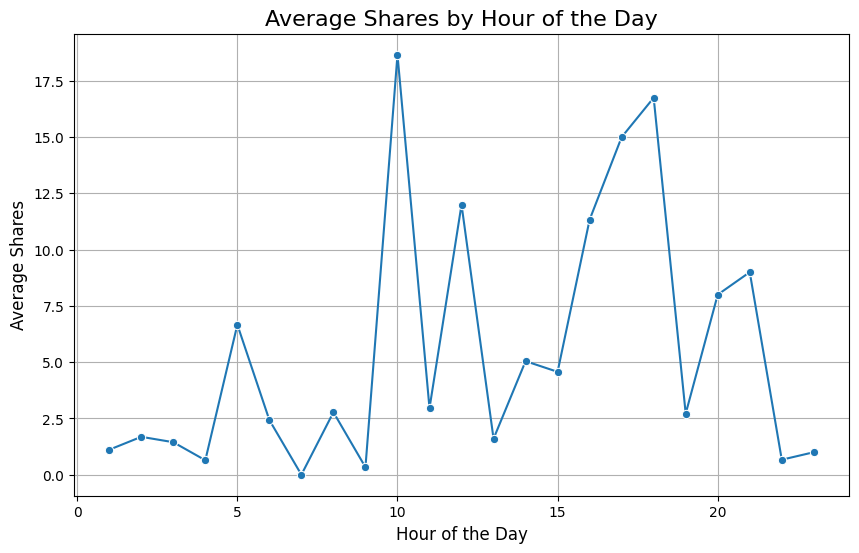

In [ ]:
# Group by 'hour' and calculate the average number of likes for each hour
likes_by_hour = data.groupby('hour')['shares'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=likes_by_hour.index, y=likes_by_hour.values, marker='o')

# Adding labels and title
plt.title('Average Shares by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Shares', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()


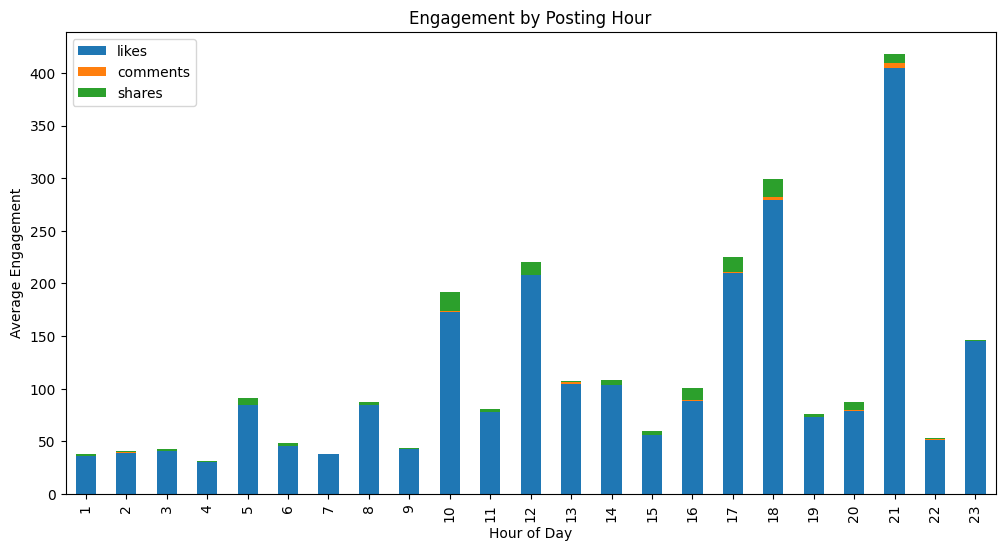

In [ ]:
# Engagement based on Posting Hour
hourly_engagement = data.groupby('hour')[['likes', 'comments', 'shares']].mean()
hourly_engagement.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Engagement by Posting Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement')
plt.show()

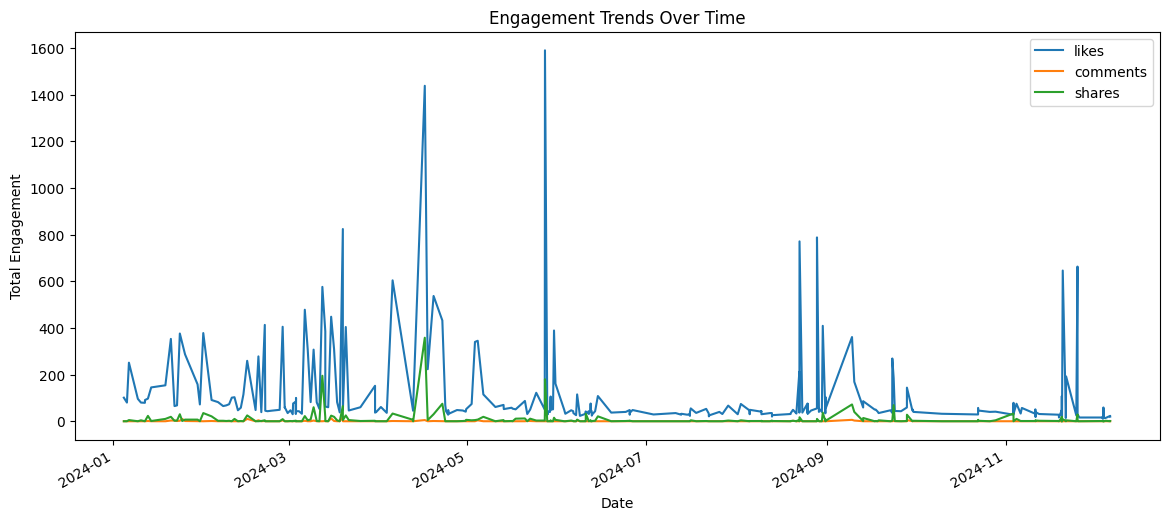

In [ ]:
# Group by date to observe trends
daily_trends = data.groupby('date')[['likes', 'comments', 'shares']].sum()

# Plot engagement trends over time
daily_trends.plot(figsize=(14, 6))
plt.title('Engagement Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Engagement')
plt.show()
